# Time Series Analysis
According to <a href='https://en.wikipedia.org/wiki/Time_series'>wikipedia</a>, a time series is "a series of data points indexed in time order." The goal of time series analysis is to predict future values based on past behavior. 

This differs from other analyses that compare $x$ to $y$, since $x$ is not really a variable. For example, if I measure the boiling point of water with 1%, 3%, 5% and 7% salt solutions, I should be able to predict the boiling point at 4%. But with time series, we can't go back and "plug in" a new value of $x$, since we can never go back in time. For this reason, a time series with one $y$ variable is called <em>univariate</em>. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../meta/co2_mm_mlo.csv', encoding='utf8')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


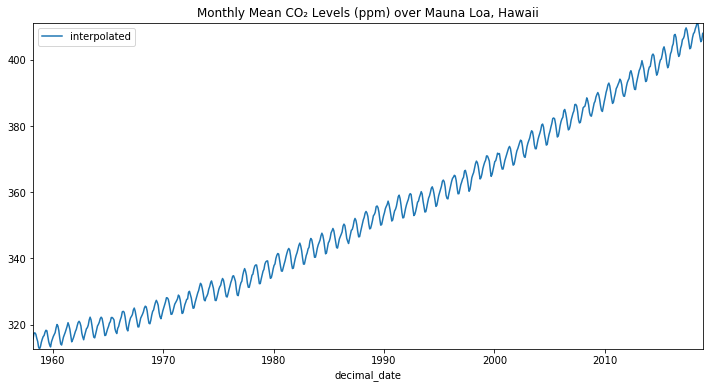

In [3]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
df.plot('decimal_date','interpolated',figsize=(12,6),title=title).autoscale(axis='both',tight=True);

The above plot clearly illustrates some of the fundamentals of time series analysis:
* **trend** - over the past 60 years there is a clear, non-linear upward trend in the levels of CO<sub>2</sub> in the atmosphere at Mauna Loa, Hawaii
* **seasonality** - within any given year there are cyclical patterns of rising and falling CO<sub>2</sub> levels
* **noise** - we also see random, non-systemic fluctuations in the data

The data seen in a time series is described as either <em>endogenous</em>, that is, caused by factors within the system, or <em>exogenous</em>, caused by factors outside the system.

## The `datetime` module

In [4]:
import datetime

### datetime `time` objects

In [5]:
tm = datetime.time(hour=19,minute=47,second=15)
print(tm)
tm

19:47:15


datetime.time(19, 47, 15)

### datetime `date` objects

In [6]:
dt = datetime.date(2019,9,19)
print(dt)
dt

2019-09-19


datetime.date(2019, 9, 19)

### datetime `datetime` objects

In [7]:
d = datetime.datetime(2019, 9, 19, 19, 47, 15)
print(d)
d

2019-09-19 19:47:15


datetime.datetime(2019, 9, 19, 19, 47, 15)

In [8]:
# When no time data is provided, minimum values are used:
d = datetime.datetime(2019, 9, 19)
print(d)

2019-09-19 00:00:00


## date, time, and datetime components

In [9]:
print(tm)
print(tm.minute)

19:47:15
47


In [10]:
print(dt)
print(dt.day)

2019-09-19
19


In [11]:
print(d)
print(d.second)

2019-09-19 00:00:00
0


##  Some Useful methods

In [12]:
d = datetime.datetime(2019, 9, 19, 19, 47, 15)

**`d.weekday()`** returns the day of the week as an integer, where Monday is 0 and Sunday is 6

In [13]:
d.weekday()

3

**`d.isoweekday()`** returns the day of the week as an integer, where Monday is 1 and Sunday is 7

In [14]:
d.isoweekday()

4

**`d.replace()`** returns a modified copy of the original, permitting substitutions for any date/time attribute
* Note that d.replace() does not change the original.

In [15]:
d.replace(year=1919,month=10)

datetime.datetime(1919, 10, 19, 19, 47, 15)

## Time tuples

**`datetime.timetuple()`** returns a named tuple of values.

<table style="display: inline-block">
<caption style="text-align: center">TIME TUPLE VALUES</caption>
<tr><th>NAME</th><th>EQUIVALENT</th><th>EXAMPLES</th></tr>
<tr><td>tm_year</td><td>d.year</td><td>2004</td></tr>
<tr><td>tm_mon</td><td>d.month</td><td>10</td></tr>
<tr><td>tm_mday</td><td>d.day</td><td>27</td></tr>
<tr><td>tm_hour</td><td>d.hour</td><td>20</td></tr>
<tr><td>tm_min</td><td>d.minute</td><td>25</td></tr>
<tr><td>tm_sec</td><td>d.second</td><td>55</td></tr>
<tr><td>tm_wday</td><td>d.weekday()</td><td>2</td></tr>
<tr><td>tm_yday</td><td>see below</td><td>301</td></tr></table>

**tm_yday** is the number of days within the current year starting with 1 for January 1st, as given by the formula<br>
&emsp;&emsp; <tt>yday = d.toordinal() - date(d.year, 1, 1).toordinal() + 1</tt><br><br>
**tm_isdst** relates to timezone setting

In [16]:
d.timetuple()

time.struct_time(tm_year=2019, tm_mon=9, tm_mday=19, tm_hour=19, tm_min=47, tm_sec=15, tm_wday=3, tm_yday=262, tm_isdst=-1)